# LABORATORY 05: Experiments with Neural Networks

## Task

   - Working in your team of 4-5 students (groups of курсовая работа), choose 1 dataset for linear separable problem for perceptron and 1 dataset for non-linear separable problem for multilayer perceptron and follow the pipeline to solve a CLASSIFICATION PROBLEM (could be binary or multiclass). If you want, you can generate data synthetically using Python math functions, but make sure that the data set will follow a linear pattern to be able to use the perceptron and a non-linear pattern to use the MLP.
   - Use the algorithms in files lesson05/scripts/perceptron.py for perceptron and lesson05/scripts/mlp.py for MLP like class templates to build your neural networks architectures, train and test the models. You can adapt these codes according your needs. Don't use frameworks like pytorch or tensorflow yet.
    
   - Use the necessary scripts of folder lesson04/scripts to build your confusion matrix and calculate the metrics of classification: accuracy, precision, recall, specificity and f1-score for your classification problem applying your datasets.
    
   - The project manager (leader of group) need publish the project in Github. Professor will revise the Github repo just from project manager. You need present your jupyter notebook with all your results together with your python scripts used in your project.



In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.datasets import make_circles

from scripts5.perceptron import PerceptronAlgorithm
from scripts5.mlp import MLPAlgorithm

from scripts4.evaluator import EvalClassifier

### Create datasets

In [ ]:

# Generate linear separable data
np.random.seed(0)
X1 = np.random.randn(50, 2) + np.array([0, -2])  # Class 0
X2 = np.random.randn(50, 2) + np.array([2, 2])   # Class 1
lX = np.vstack((X1, X2))
ly = np.array([0] * 50 + [1] * 50)


In [ ]:
with open('./data/lx.pkl', 'wb') as fp:
    pickle.dump(lX, fp)

with open('./data/ly.pkl', 'wb') as fp:
    pickle.dump(ly, fp)

In [37]:
with open('./data/lx.pkl', 'rb') as fp:
    lX = pickle.load(fp)

with open('./data/ly.pkl', 'rb') as fp:
    ly = pickle.load(fp)

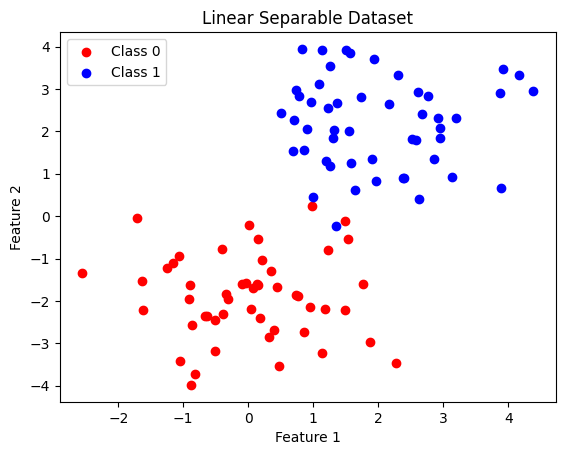

In [38]:
# Plot the dataset
plt.scatter(lX[:50, 0], lX[:50, 1], color='red', label='Class 0')
plt.scatter(lX[50:, 0], lX[50:, 1], color='blue', label='Class 1')
plt.title('Linear Separable Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [39]:
# Generate non-linear separable data
nlX, nly = make_circles(n_samples=100, noise=0.1, factor=0.5)

In [40]:
with open('./data/nlx.pkl', 'wb') as fp:
    pickle.dump(nlX, fp)

with open('./data/nly.pkl', 'wb') as fp:
    pickle.dump(nly, fp)

In [41]:
with open('./data/nlx.pkl', 'rb') as fp:
    nlX = pickle.load(fp)

with open('./data/nly.pkl', 'rb') as fp:
    nly = pickle.load(fp)

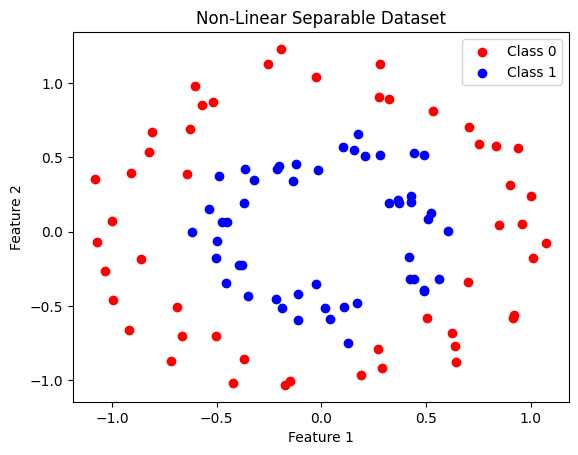

In [43]:
# Plot the dataset
plt.scatter(nlX[nly == 0][:, 0], nlX[nly == 0][:, 1], color='red', label='Class 0')
plt.scatter(nlX[nly == 1][:, 0], nlX[nly == 1][:, 1], color='blue', label='Class 1')
plt.title('Non-Linear Separable Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Classification

In [62]:
lmodel = PerceptronAlgorithm(eta = 0.1, max_epochs = 100, threshold = 1e-4)
lmodel.fit(lX, ly)

print("Loss = ", lmodel.loss)
print("Cost = ", lmodel.cost_)

Epoch  1  ===> error =  0.02 ... 

Epoch  2  ===> error =  0.02 ... 

Epoch  3  ===> error =  0.02 ... 

Epoch  4  ===> error =  0.02 ... 

Epoch  5  ===> error =  0.02 ... 

Epoch  6  ===> error =  0.02 ... 

Epoch  7  ===> error =  0.02 ... 

Epoch  8  ===> error =  0.02 ... 

Epoch  9  ===> error =  0.01 ... 

Epoch  10  ===> error =  0.02 ... 

Epoch  11  ===> error =  0.02 ... 

Epoch  12  ===> error =  0.02 ... 

Epoch  13  ===> error =  0.01 ... 

Epoch  14  ===> error =  0.02 ... 

Epoch  15  ===> error =  0.02 ... 

Epoch  16  ===> error =  0.02 ... 

Epoch  17  ===> error =  0.02 ... 

Epoch  18  ===> error =  0.01 ... 

Epoch  19  ===> error =  0.02 ... 

Epoch  20  ===> error =  0.02 ... 

Epoch  21  ===> error =  0.02 ... 

Epoch  22  ===> error =  0.01 ... 

Epoch  23  ===> error =  0.02 ... 

Epoch  24  ===> error =  0.02 ... 

Epoch  25  ===> error =  0.02 ... 

Epoch  26  ===> error =  0.02 ... 

Epoch  27  ===> error =  0.01 ... 

Epoch  28  ===> error =  0.02 ... 

E

In [74]:
ly_pred = lmodel.test(lX, ly)
print("Accuracy = ", lmodel.accuracy, "%")

Accuracy =  97.0 %


In [65]:
nlmodel = MLPAlgorithm(eta = 0.1, threshold = 1e-4, max_epochs = 20000)
nlmodel.build_architecture(input_length = 2, hidden_length = 2, output_length = 1)        

# training step
nlmodel.fit(nlX, nly)

# parameters of MLP architecture
print("Weights for hidden layers: ", nlmodel.Wh)
print("Bias for hidden layers: ", nlmodel.bh)
print("Weights for output layers: ", nlmodel.Wo)
print("Bias for output layers: ", nlmodel.bo)

# losses
print("Loss = ", nlmodel.loss_)

# output predictions
print("Output preds = ", nlmodel.fnet_o)



Epoch  100 : loss =  0.1257
Epoch  200 : loss =  0.12037
Epoch  300 : loss =  0.0966
Epoch  400 : loss =  0.08321
Epoch  500 : loss =  0.07952
Epoch  600 : loss =  0.07796
Epoch  700 : loss =  0.07693
Epoch  800 : loss =  0.07613
Epoch  900 : loss =  0.07548
Epoch  1000 : loss =  0.07492
Epoch  1100 : loss =  0.07443
Epoch  1200 : loss =  0.074
Epoch  1300 : loss =  0.07362
Epoch  1400 : loss =  0.07327
Epoch  1500 : loss =  0.07296
Epoch  1600 : loss =  0.07267
Epoch  1700 : loss =  0.07241
Epoch  1800 : loss =  0.07216
Epoch  1900 : loss =  0.07194
Epoch  2000 : loss =  0.07173
Epoch  2100 : loss =  0.07154
Epoch  2200 : loss =  0.07136
Epoch  2300 : loss =  0.07119
Epoch  2400 : loss =  0.07103
Epoch  2500 : loss =  0.07088
Epoch  2600 : loss =  0.07074
Epoch  2700 : loss =  0.07061
Epoch  2800 : loss =  0.07049
Epoch  2900 : loss =  0.07037
Epoch  3000 : loss =  0.07026
Epoch  3100 : loss =  0.07016
Epoch  3200 : loss =  0.07006
Epoch  3300 : loss =  0.06997
Epoch  3400 : loss =  0

In [66]:
# testing
nly_pred = nlmodel.test(nlX, nly)
print("Accuracy = ", nlmodel.accuracy, "%")

Accuracy =  83.0 %


### Confusion matrix and metrics of classification

#### linear separable problem 

In [81]:
print([int(i) for i in ly_pred] )
print(ly)

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


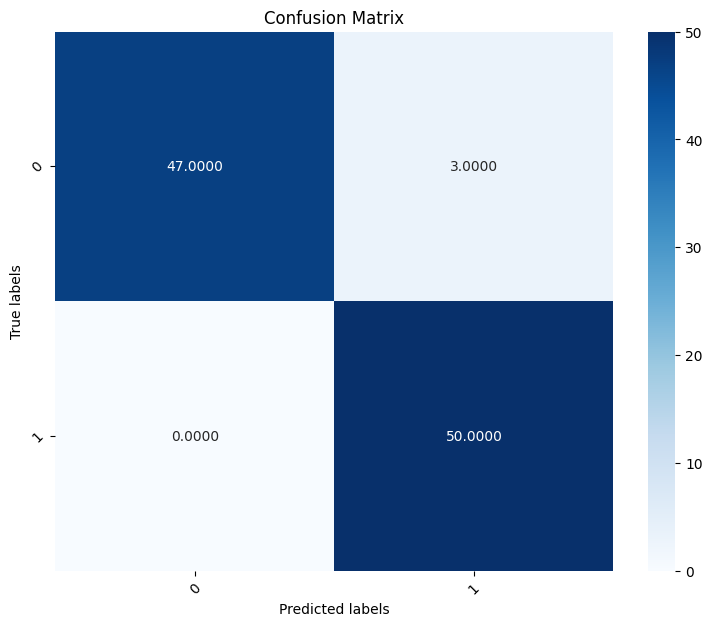

In [76]:
# get confusion matrix
eval = EvalClassifier(lmodel)
classes = [0, 1]
cm = eval.get_confusion_matrix(ly, [int(i) for i in ly_pred] , classes)
eval.plot_confusion_matrix(cm, classes)

In [77]:
# calculate the metrics for whole test set
metrics = eval.calculate_metrics_by_class(cm, classes)
xall = eval.calculate_metrics_xall(cm, metrics)
eval.calculate_metrics_xall(cm, metrics)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.97,0.971698,0.97,0.97,0.969973


#### not-linear separable problem

In [82]:
print([int(i) for i in nly_pred])
print(nly)

[0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1]
[0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0
 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1
 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0]


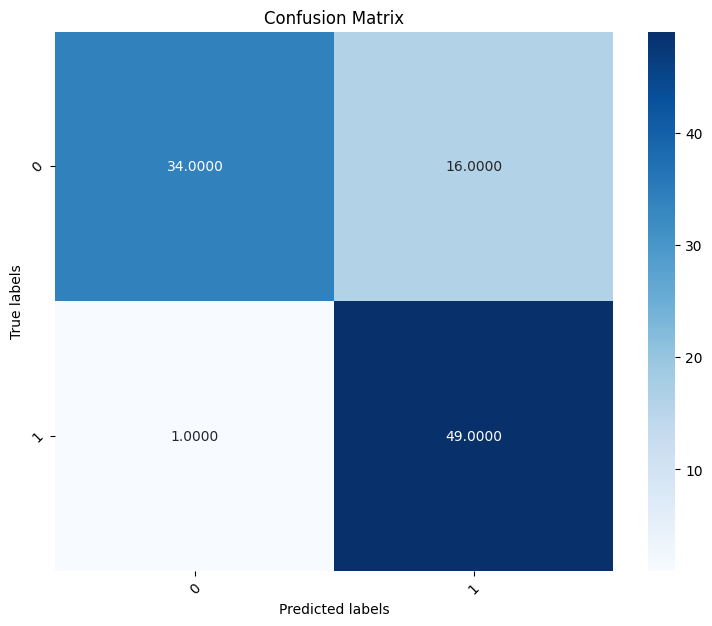

In [83]:
# get confusion matrix
eval = EvalClassifier(nlmodel)
classes = [0, 1]
cm = eval.get_confusion_matrix(nly, [int(i) for i in nly_pred] , classes)
eval.plot_confusion_matrix(cm, classes)

In [84]:
# calculate the metrics for whole test set
metrics = eval.calculate_metrics_by_class(cm, classes)
xall = eval.calculate_metrics_xall(cm, metrics)
eval.calculate_metrics_xall(cm, metrics)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.83,0.862637,0.83,0.83,0.826087
